In [1]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [2]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [3]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

### 导数

In [4]:
def numerical_diff(f, x):
    h = 10e-50 
    return (f(x+h) - f(x)) / h

In [5]:
def numerical_diff2(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

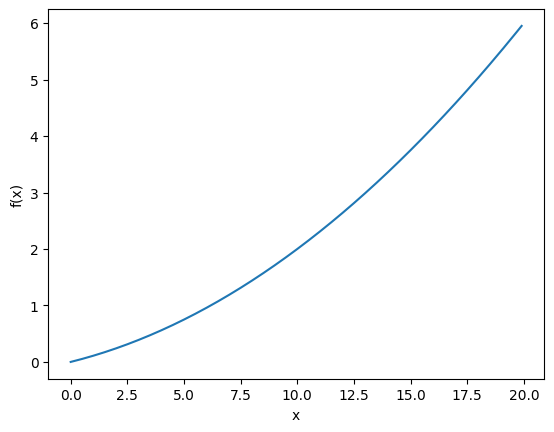

In [6]:
import numpy as np 
import matplotlib.pylab as plt

x = np.arange(0.0, 20.0, 0.1) # 以0.1为单位，从0到20的数组x
y = function_1(x)

plt.xlabel("x") 
plt.ylabel("f(x)") 
plt.plot(x, y) 
plt.show()

In [7]:
numerical_diff(function_1, 5)

0.0

In [8]:
numerical_diff(function_1, 10)

0.0

In [9]:
def function_2(x):
    return np.sum(x**2)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 创建网格数据
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = X1**2 + X2**2

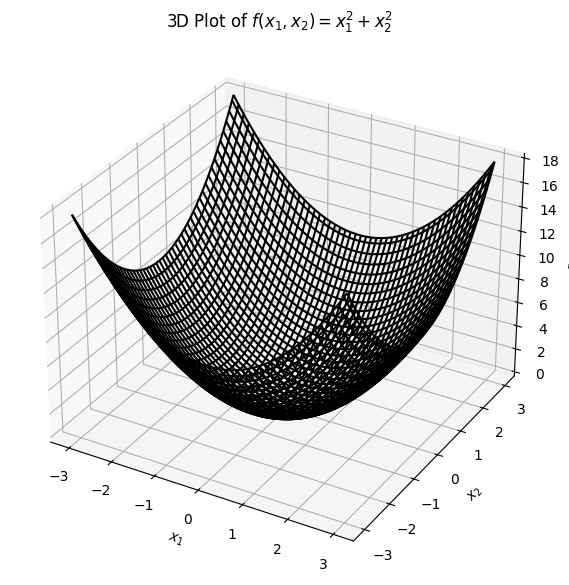

In [11]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(X1, X2, Z, color='black')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')
ax.set_title('3D Plot of $f(x_1, x_2) = x_1^2 + x_2^2$')

plt.show()

### 偏导数

In [12]:
def function_tmp1(x0):
    print(x0)
    return x0*x0 + 4.0**2.0

def numerical_diff(f, x):
    h = 10e-5 # 不能太大
    return (f(x+h) - f(x)) / h

In [13]:
numerical_diff(function_tmp1, 3.0)

3.0001
3.0


6.000099999994291

In [14]:
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1

In [15]:
numerical_diff(function_tmp2, 4.0)

8.00009999998963

## 梯度

In [16]:
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h)的计算
        x[idx] = tmp_val + h
        fxh1 = f(x)
        
        # f(x-h)的计算
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 还原值 
    return grad

In [17]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [18]:
import sys, os 
sys.path.append(os.pardir) 
import numpy as np 
from common.functions import softmax, cross_entropy_error 
from common.gradient import numerical_gradient

class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 用高斯分布进行初始化
    
    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x) 
        y = softmax(z) 
        loss = cross_entropy_error(y, t)
        return loss

In [19]:
net = simpleNet()
print(net.W)

[[-0.1925698   1.20254046 -0.11355438]
 [-0.5519858  -0.28202439  0.42630962]]


In [20]:
x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

[-0.61232909  0.46770232  0.31554603]


In [21]:
np.argmax(p)

np.int64(1)

In [22]:
t = np.array([0, 0, 1]) # 正确解标签
net.loss(x, t)

np.float64(0.939903550362634)

In [23]:
def f(W):
    return net.loss(x, t)

dW = numerical_gradient(f, net.W)
dW

array([[ 0.09267979,  0.27292087, -0.36560066],
       [ 0.13901969,  0.4093813 , -0.54840099]])